# Chinook: exploratory analysis of a music store database

#### We perform an exploratory analysis on a music store database in order to extract some useful business information.

We connect to the database and show its database schema.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn.utils import shuffle

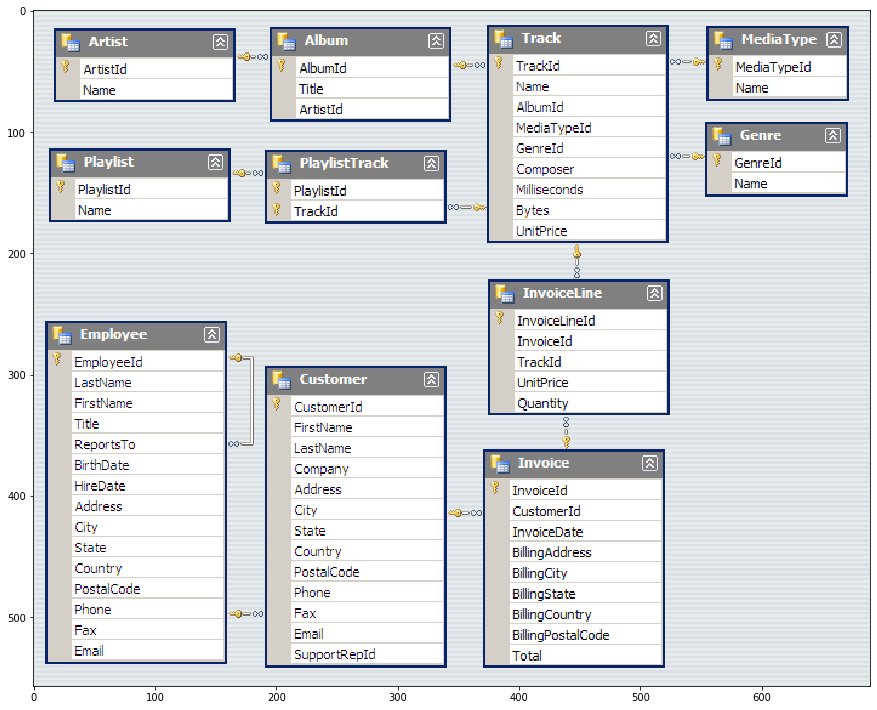

In [2]:
img = plt.imread("ChinookDatabaseSchema.png")
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(img)

In [3]:
conn = sqlite3.connect('chinook.db')

-----

We load the 'Album' table and show some of its statistics.

In [4]:
query = """
        SELECT *
        FROM Album
        """

album = pd.read_sql(query, conn) 
album.head(10)

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
5,6,Jagged Little Pill,4
6,7,Facelift,5
7,8,Warner 25 Anos,6
8,9,Plays Metallica By Four Cellos,7
9,10,Audioslave,8


In [5]:
album.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
AlbumId     347 non-null int64
Title       347 non-null object
ArtistId    347 non-null int64
dtypes: int64(2), object(1)
memory usage: 8.3+ KB


In [6]:
album.describe()

,AlbumId,ArtistId
count,347.000000,347.000000
mean,174.000000,121.942363
std,100.314505,77.793131
min,1.000000,1.000000
25%,87.500000,58.000000
50%,174.000000,112.000000
75%,260.500000,179.500000
max,347.000000,275.000000


We load the 'Artist' table and show some of its statistics.

In [7]:
query = """
        SELECT *
        FROM Artist    
        """

artist = pd.read_sql(query, conn)
artist.head(10)

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
5,6,Antônio Carlos Jobim
6,7,Apocalyptica
7,8,Audioslave
8,9,BackBeat
9,10,Billy Cobham


In [8]:
artist.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
ArtistId    275 non-null int64
Name        275 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


In [9]:
artist.describe()

,ArtistId
count,275.000000
mean,138.000000
std,79.529869
min,1.000000
25%,69.500000
50%,138.000000
75%,206.500000
max,275.000000


We load the 'Customer' table and show some of its statistics.

In [10]:
query = """
        SELECT *
        FROM Customer    
        """

customer = pd.read_sql(query, conn)
customer.head(10)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


In [11]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
CustomerId      59 non-null int64
FirstName       59 non-null object
LastName        59 non-null object
Company         10 non-null object
Address         59 non-null object
City            59 non-null object
State           30 non-null object
Country         59 non-null object
PostalCode      55 non-null object
Phone           58 non-null object
Fax             12 non-null object
Email           59 non-null object
SupportRepId    59 non-null int64
dtypes: int64(2), object(11)
memory usage: 6.1+ KB


In [12]:
customer.describe()

,CustomerId,SupportRepId
count,59.000000,59.000000
mean,30.000000,3.949153
std,17.175564,0.818403
min,1.000000,3.000000
25%,15.500000,3.000000
50%,30.000000,4.000000
75%,44.500000,5.000000
max,59.000000,5.000000


We load the 'Employee' table and show some of its statistics.

In [13]:
query = """
        SELECT *
        FROM Employee   
        """

employee = pd.read_sql(query, conn)
employee.head(10)

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [14]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
EmployeeId    8 non-null int64
LastName      8 non-null object
FirstName     8 non-null object
Title         8 non-null object
ReportsTo     7 non-null float64
BirthDate     8 non-null object
HireDate      8 non-null object
Address       8 non-null object
City          8 non-null object
State         8 non-null object
Country       8 non-null object
PostalCode    8 non-null object
Phone         8 non-null object
Fax           8 non-null object
Email         8 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 1.1+ KB


In [15]:
employee.describe()

,EmployeeId,ReportsTo
count,8.00000,7.000000
mean,4.50000,2.857143
std,2.44949,2.193063
min,1.00000,1.000000
25%,2.75000,1.500000
50%,4.50000,2.000000
75%,6.25000,4.000000
max,8.00000,6.000000


We load the 'Genre' table and show some of its statistics.

In [16]:
query = """
        SELECT *
        FROM Genre    
        """

genre = pd.read_sql(query, conn)
genre.head(10)

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


In [17]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
GenreId    25 non-null int64
Name       25 non-null object
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


In [18]:
genre.describe()

,GenreId
count,25.000000
mean,13.000000
std,7.359801
min,1.000000
25%,7.000000
50%,13.000000
75%,19.000000
max,25.000000


We load the 'Invoice' table and show some of its statistics.

In [19]:
query = """
        SELECT *
        FROM Invoice   
        """

invoice = pd.read_sql(query, conn)
invoice.head(10)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
5,6,37,2009-01-19 00:00:00,Berger Straße 10,Frankfurt,None,Germany,60316,0.99
6,7,38,2009-02-01 00:00:00,Barbarossastraße 19,Berlin,None,Germany,10779,1.98
7,8,40,2009-02-01 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
8,9,42,2009-02-02 00:00:00,"9, Place Louis Barthou",Bordeaux,None,France,33000,3.96
9,10,46,2009-02-03 00:00:00,3 Chatham Street,Dublin,Dublin,Ireland,None,5.94


In [20]:
invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
InvoiceId            412 non-null int64
CustomerId           412 non-null int64
InvoiceDate          412 non-null object
BillingAddress       412 non-null object
BillingCity          412 non-null object
BillingState         210 non-null object
BillingCountry       412 non-null object
BillingPostalCode    384 non-null object
Total                412 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 29.1+ KB


In [21]:
invoice.describe()

,InvoiceId,CustomerId,Total
count,412.000000,412.000000,412.000000
mean,206.500000,29.929612,5.651942
std,119.078406,17.010585,4.745320
min,1.000000,1.000000,0.990000
25%,103.750000,15.000000,1.980000
50%,206.500000,30.000000,3.960000
75%,309.250000,45.000000,8.910000
max,412.000000,59.000000,25.860000


We load the 'InvoiceLine' table and show some of its statistics.

In [22]:
query = """
        SELECT *
        FROM InvoiceLine   
        """

invoiceline = pd.read_sql(query, conn)
invoiceline.head(10)

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1
5,6,2,12,0.99,1
6,7,3,16,0.99,1
7,8,3,20,0.99,1
8,9,3,24,0.99,1
9,10,3,28,0.99,1


In [23]:
invoiceline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 5 columns):
InvoiceLineId    2240 non-null int64
InvoiceId        2240 non-null int64
TrackId          2240 non-null int64
UnitPrice        2240 non-null float64
Quantity         2240 non-null int64
dtypes: float64(1), int64(4)
memory usage: 87.6 KB


In [24]:
invoiceline.describe()

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.0
mean,1120.500000,206.868750,1717.734375,1.039554,1.0
std,646.776623,119.134877,993.797999,0.217069,0.0
min,1.000000,1.000000,1.000000,0.990000,1.0
25%,560.750000,103.000000,874.000000,0.990000,1.0
50%,1120.500000,207.000000,1708.000000,0.990000,1.0
75%,1680.250000,311.000000,2560.000000,0.990000,1.0
max,2240.000000,412.000000,3500.000000,1.990000,1.0


We load the 'MediaType' table and show some of its statistics.

In [25]:
query = """
        SELECT *
        FROM MediaType    
        """

mediatype = pd.read_sql(query, conn)
mediatype.head(10)

,MediaTypeId,Name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


In [26]:
mediatype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
MediaTypeId    5 non-null int64
Name           5 non-null object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [27]:
mediatype.describe()

,MediaTypeId
count,5.000000
mean,3.000000
std,1.581139
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


We load the 'Playlist' table and show some of its statistics.

In [28]:
query = """
        SELECT *
        FROM Playlist   
        """

playlist = pd.read_sql(query, conn)
playlist.head(10)

,PlaylistId,Name
0,1,Music
1,2,Movies
2,3,TV Shows
3,4,Audiobooks
4,5,90’s Music
5,6,Audiobooks
6,7,Movies
7,8,Music
8,9,Music Videos
9,10,TV Shows


In [29]:
playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
PlaylistId    18 non-null int64
Name          18 non-null object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [30]:
playlist.describe()

,PlaylistId
count,18.000000
mean,9.500000
std,5.338539
min,1.000000
25%,5.250000
50%,9.500000
75%,13.750000
max,18.000000


We load the 'PlaylistTrack' table and show some of its statistics.

In [31]:
query = """
        SELECT *
        FROM PlaylistTrack    
        """

playlisttrack = pd.read_sql(query, conn)
playlisttrack.head(10)

,PlaylistId,TrackId
0,1,NaN
1,1,3389.0
2,1,3390.0
3,1,3391.0
4,1,3392.0
5,1,3393.0
6,1,3394.0
7,1,3395.0
8,1,3396.0
9,1,3397.0


In [32]:
playlisttrack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8715 entries, 0 to 8714
Data columns (total 2 columns):
PlaylistId    8715 non-null int64
TrackId       8714 non-null float64
dtypes: float64(1), int64(1)
memory usage: 136.3 KB


In [33]:
playlisttrack.describe()

,PlaylistId,TrackId
count,8715.000000,8714.000000
mean,4.917040,1766.894078
std,3.476453,1023.578166
min,1.000000,1.000000
25%,1.000000,888.000000
50%,5.000000,1772.500000
75%,8.000000,2652.000000
max,18.000000,3503.000000


We load the 'Track' table and show some of its statistics.

In [34]:
query = """
        SELECT *
        FROM Track   
        """

track = pd.read_sql(query, conn)
track.head(10)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
5,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
6,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99
7,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
8,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99
9,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99


In [35]:
track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
TrackId         3503 non-null int64
Name            3503 non-null object
AlbumId         3503 non-null int64
MediaTypeId     3503 non-null int64
GenreId         3503 non-null int64
Composer        2525 non-null object
Milliseconds    3503 non-null int64
Bytes           3503 non-null int64
UnitPrice       3503 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 246.4+ KB


In [36]:
track.describe()

,TrackId,AlbumId,MediaTypeId,GenreId,Milliseconds,Bytes,UnitPrice
count,3503.000000,3503.000000,3503.000000,3503.000000,3.503000e+03,3.503000e+03,3503.000000
mean,1752.000000,140.929489,1.208393,5.725378,3.935992e+05,3.351021e+07,1.050805
std,1011.373324,81.775395,0.580443,6.190204,5.350054e+05,1.053925e+08,0.239006
min,1.000000,1.000000,1.000000,1.000000,1.071000e+03,3.874700e+04,0.990000
25%,876.500000,70.500000,1.000000,1.000000,2.072810e+05,6.342566e+06,0.990000
50%,1752.000000,141.000000,1.000000,3.000000,2.556340e+05,8.107896e+06,0.990000
75%,2627.500000,212.000000,1.000000,7.000000,3.216450e+05,1.026679e+07,0.990000
max,3503.000000,347.000000,5.000000,25.000000,5.286953e+06,1.059546e+09,1.990000


-----

Let's perform some exploratory analysis asking some basic business questions. One criteria to know which questions to ask could be the usage of the items sold to perform recommendations of other items to each customer. Another criteria could be to reward customers in some way depending on their spending. A much more internal business criteria could be to reward sales employees based on their performance and seniority. Let's use these examples to ask the corresponding questions.

Here we construct a 'track per album' table that will be used in future steps.

In [37]:
query = """
        SELECT Track.TrackId, Track.Name, Album.AlbumId, Album.Title
        FROM Track INNER JOIN Album ON Track.AlbumId=Album.AlbumId
        ORDER BY Album.Title
        """

track_album = pd.read_sql(query, conn)
track_album.head()

,TrackId,Name,AlbumId,Title
0,1893,Blackened,156,...And Justice For All
1,1894,...And Justice For All,156,...And Justice For All
2,1895,Eye Of The Beholder,156,...And Justice For All
3,1896,One,156,...And Justice For All
4,1897,The Shortest Straw,156,...And Justice For All


Here we construct a 'track per artist' table that will be used in future steps.

In [38]:
query = """
        SELECT Track.TrackId, Track.Name, Artist.ArtistId, Artist.Name
        FROM Track INNER JOIN Album ON Track.AlbumId=Album.AlbumId INNER JOIN Artist ON Album.ArtistId=Artist.Artistid
        ORDER BY Artist.Name
        """

track_artist = pd.read_sql(query, conn)
track_artist.head()

,TrackId,Name,ArtistId,Name
0,1,For Those About To Rock (We Salute You),1,AC/DC
1,6,Put The Finger On You,1,AC/DC
2,7,Let's Get It Up,1,AC/DC
3,8,Inject The Venom,1,AC/DC
4,9,Snowballed,1,AC/DC


Here we construct a 'track per genre' table that will be used in future steps.

In [39]:
query = """
        SELECT Track.TrackId, Track.Name, Genre.GenreId, Genre.Name
        FROM Track INNER JOIN Genre ON Track.GenreId=Genre.GenreId
        ORDER BY Genre.Name
        """

track_genre = pd.read_sql(query, conn)
track_genre.head()

,TrackId,Name,GenreId,Name
0,3336,War Pigs,23,Alternative
1,3365,Say Hello 2 Heaven,23,Alternative
2,3366,Reach Down,23,Alternative
3,3367,Hunger Strike,23,Alternative
4,3368,Pushin Forward Back,23,Alternative


Here we construct a 'customer/purchased track' table that will be used in future steps.

In [40]:
query = """
        SELECT Customer.CustomerId, Customer.FirstName, Customer.LastName, InvoiceLine.TrackId 
        FROM InvoiceLine INNER JOIN Invoice ON InvoiceLine.InvoiceId=Invoice.InvoiceId INNER JOIN Customer ON Invoice.CustomerId=Customer.CustomerId
        ORDER BY InvoiceLine.TrackId 
        """

customer_track = pd.read_sql(query, conn)
customer_track.head()

,CustomerId,FirstName,LastName,TrackId
0,47,Lucas,Mancini,1
1,2,Leonie,Köhler,2
2,33,Ellie,Sullivan,2
3,13,Fernanda,Ramos,3
4,2,Leonie,Köhler,4


-----

Using the previous tables, we construct a 'customer/purchase made from album' table that could be used in some business decisions mentioned before.

In [41]:
customer_album = pd.merge(customer_track, track_album, how='inner', on='TrackId')
customer_album = customer_album.iloc[:,[0,1,2,5,6]]
customer_album.head()

,CustomerId,FirstName,LastName,AlbumId,Title
0,47,Lucas,Mancini,1,For Those About To Rock We Salute You
1,2,Leonie,Köhler,2,Balls to the Wall
2,33,Ellie,Sullivan,2,Balls to the Wall
3,13,Fernanda,Ramos,3,Restless and Wild
4,2,Leonie,Köhler,3,Restless and Wild


Using the previous tables, we construct a 'customer/purchase made from artist' table that could be used in some business decisions mentioned before.

In [42]:
customer_artist = pd.merge(customer_track, track_artist, how='inner', on='TrackId')
customer_artist = customer_artist.iloc[:,[0,1,2,5,6]]
customer_artist.head()

,CustomerId,FirstName,LastName,ArtistId,Name
0,47,Lucas,Mancini,1,AC/DC
1,2,Leonie,Köhler,2,Accept
2,33,Ellie,Sullivan,2,Accept
3,13,Fernanda,Ramos,2,Accept
4,2,Leonie,Köhler,2,Accept


Using the previous tables, we construct a 'customer/purchase made from genre' table that could be used in some business decisions mentioned before.

In [43]:
customer_genre = pd.merge(customer_track, track_genre, how='inner', on='TrackId')
customer_genre = customer_genre.iloc[:,[0,1,2,5,6]]
customer_genre.head()

,CustomerId,FirstName,LastName,GenreId,Name
0,47,Lucas,Mancini,1,Rock
1,2,Leonie,Köhler,1,Rock
2,33,Ellie,Sullivan,1,Rock
3,13,Fernanda,Ramos,1,Rock
4,2,Leonie,Köhler,1,Rock


-----

Let's construct a table that shows total sales for each album and plot the top 20 of them. This could be used in different ways such as maintaining stock or for future discounts etc.

In [44]:
query = """
        SELECT Album.AlbumId, Album.Title, COUNT(InvoiceLine.TrackId) TotalSales
        FROM InvoiceLine INNER JOIN Track ON InvoiceLine.TrackId=Track.TrackId INNER JOIN Album ON Track.AlbumId=Album.AlbumId
        GROUP BY Album.AlbumId
        ORDER BY TotalSales DESC
        """

sales_album = pd.read_sql(query, conn)
sales_album.head()

,AlbumId,Title,TotalSales
0,23,Minha Historia,27
1,141,Greatest Hits,26
2,73,Unplugged,25
3,224,Acústico,22
4,37,Greatest Kiss,20


<BarContainer object of 20 artists>

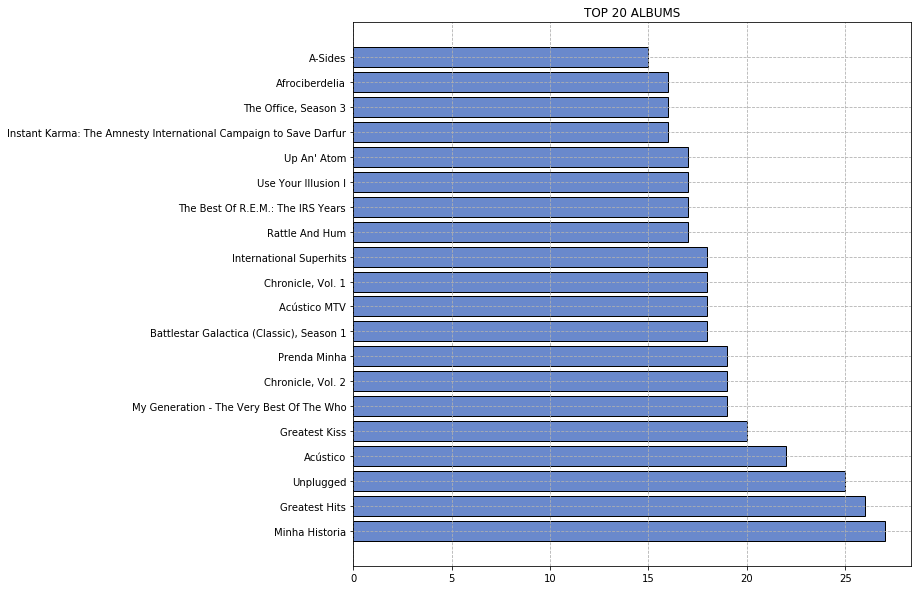

In [45]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.grid(b=True, linestyle='--')
ax.set_title('TOP 20 ALBUMS')
ax.barh(sales_album.head(20).loc[:,'Title'], sales_album.head(20).loc[:,'TotalSales'], color='#6A89CC', edgecolor='#000000')

Let's construct a table that shows total sales for each artist and plot the top 40 of them. This could be used in different ways such as diversifying stock or for future discounts etc.

In [46]:
query = """
        SELECT Artist.ArtistId, Artist.Name, COUNT(InvoiceLine.TrackId) TotalSales
        FROM InvoiceLine INNER JOIN Track ON InvoiceLine.TrackId=Track.TrackId INNER JOIN Album ON Track.AlbumId=Album.AlbumId INNER JOIN Artist ON Album.ArtistId=Artist.ArtistId
        GROUP BY Artist.ArtistId
        ORDER BY TotalSales DESC
        """

sales_artist = pd.read_sql(query, conn)
sales_artist.head()

,ArtistId,Name,TotalSales
0,90,Iron Maiden,140
1,150,U2,107
2,50,Metallica,91
3,22,Led Zeppelin,87
4,113,Os Paralamas Do Sucesso,45


<BarContainer object of 40 artists>

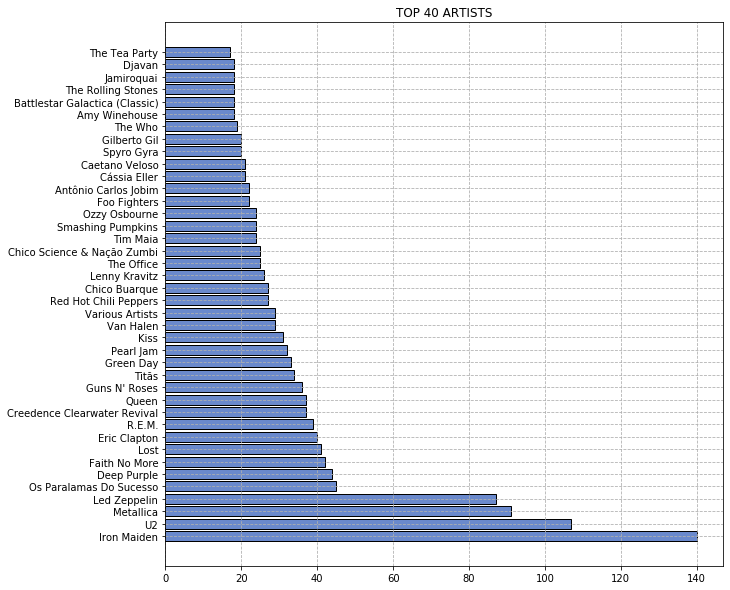

In [47]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.grid(b=True, linestyle='--')
ax.set_title('TOP 40 ARTISTS')
ax.barh(sales_artist.head(40).loc[:,'Name'], sales_artist.head(40).loc[:,'TotalSales'], color='#6A89CC', edgecolor='#000000')

Let's construct a table that shows total sales for each genre and plot the top 5 of them. This could be used in different ways such as diversifying stock or for future discounts etc.

In [48]:
query = """
        SELECT Genre.GenreId, Genre.Name, COUNT(InvoiceLine.TrackId) TotalSales
        FROM InvoiceLine INNER JOIN Track ON InvoiceLine.TrackId=Track.TrackId INNER JOIN Genre ON Track.GenreId=Genre.GenreId
        GROUP BY Genre.GenreId
        ORDER BY TotalSales DESC
        """

sales_genre = pd.read_sql(query, conn)
sales_genre.head()

,GenreId,Name,TotalSales
0,1,Rock,835
1,7,Latin,386
2,3,Metal,264
3,4,Alternative & Punk,244
4,2,Jazz,80


<BarContainer object of 5 artists>

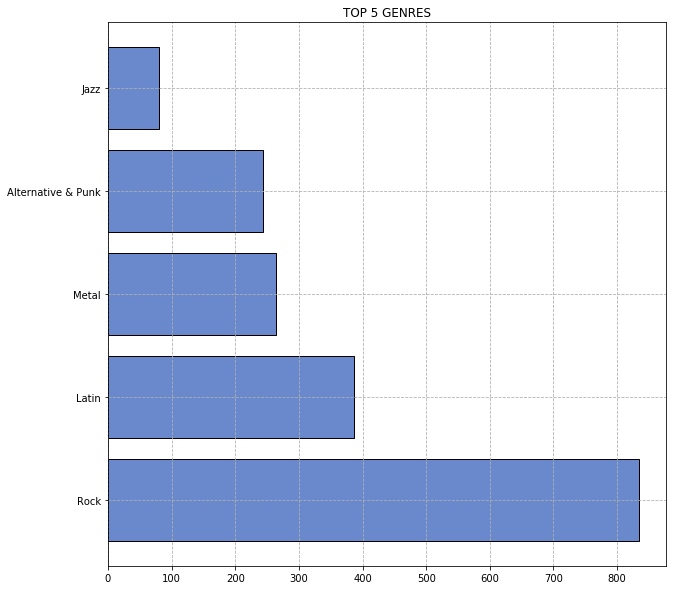

In [49]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.grid(b=True, linestyle='--')
ax.set_title('TOP 5 GENRES')
ax.barh(sales_genre.head(5).loc[:,'Name'], sales_genre.head(5).loc[:,'TotalSales'], color='#6A89CC', edgecolor='#000000')

Let's construct a table that shows total sales for each customer and plot the top 10 of them. This could be used in different ways such as for future discounts etc.

In [50]:
query = """
        SELECT Customer.CustomerId, Customer.FirstName||' '||Customer.LastName AS FullName, SUM(InvoiceLine.UnitPrice) TotalSales
        FROM InvoiceLine INNER JOIN Invoice ON InvoiceLine.InvoiceId=Invoice.InvoiceId INNER JOIN Customer ON Invoice.CustomerId=Customer.CustomerId
        GROUP BY Customer.CustomerId
        ORDER BY TotalSales DESC
        """

sales_customer = pd.read_sql(query, conn)
sales_customer.head()

,CustomerId,FullName,TotalSales
0,6,Helena Holý,49.62
1,26,Richard Cunningham,47.62
2,57,Luis Rojas,46.62
3,46,Hugh O'Reilly,45.62
4,45,Ladislav Kovács,45.62


<BarContainer object of 10 artists>

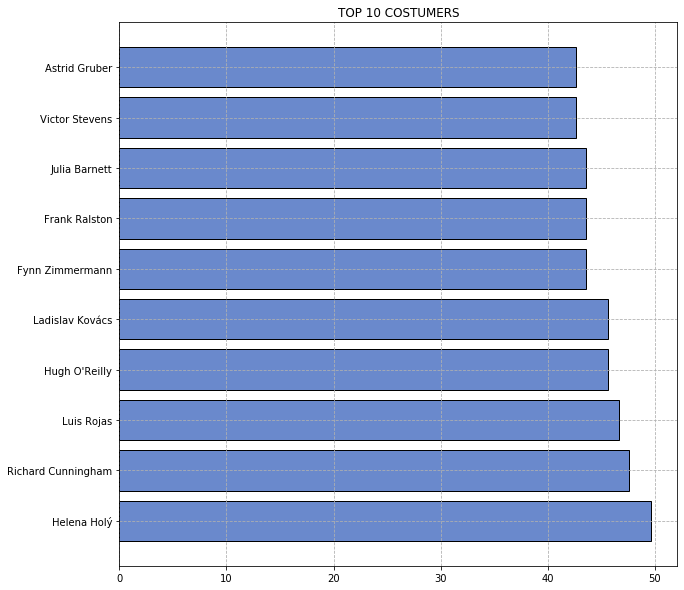

In [51]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.grid(b=True, linestyle='--')
ax.set_title('TOP 10 COSTUMERS')
ax.barh(sales_customer.head(10).loc[:,'FullName'], sales_customer.head(10).loc[:,'TotalSales'], color='#6A89CC', edgecolor='#000000')

Let's construct a table that shows total sales and labor seniority for each sales employee and plot the top 3 of them. This could be used in different ways such as rewarding performance, addressing possible underachievements etc.

In [52]:
query = """
        SELECT Employee.EmployeeId, Employee.FirstName||' '||Employee.LastName AS FullName, SUM(InvoiceLine.UnitPrice) TotalSales, DATE('now') - Employee.HireDate AS LaborSeniority
        FROM InvoiceLine INNER JOIN Invoice ON InvoiceLine.InvoiceId=Invoice.InvoiceId INNER JOIN Customer ON Invoice.CustomerId=Customer.CustomerId INNER JOIN Employee ON Customer.SupportRepId=Employee.EmployeeId
        WHERE Employee.Title='Sales Support Agent'
        GROUP BY Employee.EmployeeId
        ORDER BY TotalSales DESC
        """

sales_employee = pd.read_sql(query, conn)
sales_employee.head(3)

,EmployeeId,FullName,TotalSales,LaborSeniority
0,3,Jane Peacock,833.04,19
1,4,Margaret Park,775.40,18
2,5,Steve Johnson,720.16,18


<BarContainer object of 3 artists>

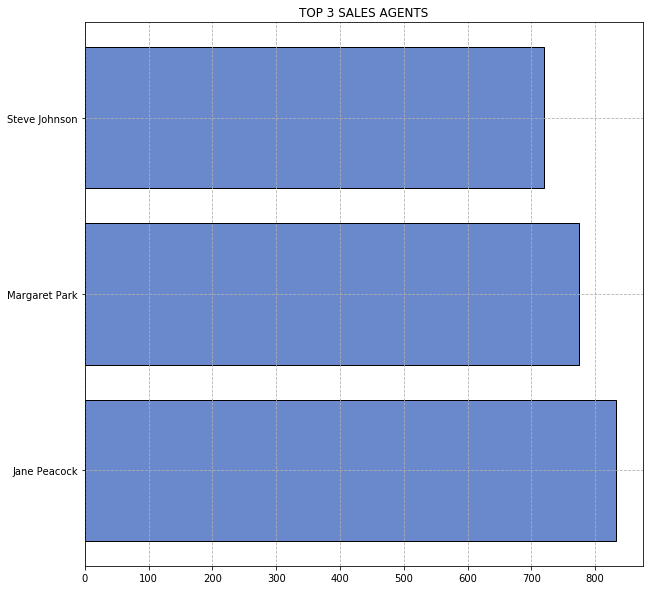

In [53]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.grid(b=True, linestyle='--')
ax.set_title('TOP 3 SALES AGENTS')
ax.barh(sales_employee.head(3).loc[:,'FullName'], sales_employee.head(3).loc[:,'TotalSales'], color='#6A89CC', edgecolor='#000000')

-----

Finally let's construct some naive recommendation systems. For each customer we recommend new tracks based on their market basket history. We recommemd new songs based on the bought tracks albums, on the bought tracks artists and on the bought tracks genre respectively.

In [54]:
def recommend_track_per_album(CustomerId):
    query = """
            SELECT Track.TrackId, Track.Name, Album.AlbumId, Album.Title
            FROM Track INNER JOIN Album ON Track.AlbumId=Album.AlbumId
            WHERE Track.TrackId NOT IN (
                SELECT InvoiceLine.TrackId
                FROM InvoiceLine INNER JOIN Invoice ON InvoiceLine.InvoiceId=Invoice.InvoiceId 
                WHERE Invoice.CustomerId={}
            ) AND Track.AlbumId IN (
                SELECT DISTINCT Track.AlbumId
                FROM InvoiceLine INNER JOIN Invoice ON InvoiceLine.InvoiceId=Invoice.InvoiceId INNER JOIN Track ON InvoiceLine.TrackId=Track.TrackId 
                WHERE Invoice.CustomerId={}
            )
            """
    return shuffle(pd.read_sql(query.format(CustomerId,CustomerId), conn))

In [55]:
recommend_track_per_album(CustomerId=6).head(10)

,TrackId,Name,AlbumId,Title
43,1459,Manifest Destiny,118,The Return Of The Space Cowboy
3,197,Pretty Baby,20,The Best Of Buddy Guy - The Millenium Collection
9,204,Talkin' 'Bout Women Obviously,20,The Best Of Buddy Guy - The Millenium Collection
110,2481,Waiting,201,Judas 0: B-Sides and Rarities
143,2835,Maelstrom,227,"Battlestar Galactica, Season 3"
178,2890,Tricia Tanaka Is Dead,229,"Lost, Season 3"
131,2821,"Exodus, Pt. 1",227,"Battlestar Galactica, Season 3"
174,2875,Not In Portland,229,"Lost, Season 3"
125,2813,Miséria,225,Volume Dois
70,1490,Hey Joe,120,Are You Experienced?


In [56]:
customer_album.query('CustomerId==6')

,CustomerId,FirstName,LastName,AlbumId,Title
124,6,Helena,Holý,20,The Best Of Buddy Guy - The Millenium Collection
126,6,Helena,Holý,21,Prenda Minha
131,6,Helena,Holý,21,Prenda Minha
135,6,Helena,Holý,21,Prenda Minha
140,6,Helena,Holý,21,Prenda Minha
143,6,Helena,Holý,21,Prenda Minha
945,6,Helena,Holý,116,Emergency On Planet Earth
948,6,Helena,Holý,116,Emergency On Planet Earth
952,6,Helena,Holý,117,Synkronized
955,6,Helena,Holý,117,Synkronized


In [57]:
def recommend_track_per_artist(CustomerId):
    query = """
            SELECT Track.TrackId, Track.Name, Artist.ArtistId, Artist.Name
            FROM Track INNER JOIN Album ON Track.AlbumId=Album.AlbumId INNER JOIN Artist ON Album.ArtistId=Artist.ArtistId
            WHERE Track.TrackId NOT IN (
                SELECT InvoiceLine.TrackId
                FROM InvoiceLine INNER JOIN Invoice ON InvoiceLine.InvoiceId=Invoice.InvoiceId 
                WHERE Invoice.CustomerId={}
            ) AND Album.ArtistId IN (
                SELECT DISTINCT Album.ArtistId
                FROM InvoiceLine INNER JOIN Invoice ON InvoiceLine.InvoiceId=Invoice.InvoiceId INNER JOIN Track ON InvoiceLine.TrackId=Track.TrackId INNER JOIN Album ON Track.AlbumId=Album.AlbumId 
                WHERE Invoice.CustomerId={}
            )
            """
    return shuffle(pd.read_sql(query.format(CustomerId,CustomerId), conn))

In [58]:
recommend_track_per_artist(CustomerId=6).head(10)

,TrackId,Name,ArtistId,Name
209,2829,The Eye of Jupiter,147,Battlestar Galactica
231,2854,Company Man,148,Heroes
189,2807,Não Vou Me Adaptar,146,Titãs
390,2994,Silver And Gold,150,U2
411,3019,Seconds,150,U2
105,2300,E-Bow The Letter,124,R.E.M.
347,2951,Sweetest Thing,150,U2
37,1448,Failling,92,Jamiroquai
395,3000,God Part II,150,U2
158,2501,Perfect,131,Smashing Pumpkins


In [59]:
customer_artist.query('CustomerId==6')

,CustomerId,FirstName,LastName,ArtistId,Name
124,6,Helena,Holý,15,Buddy Guy
126,6,Helena,Holý,16,Caetano Veloso
131,6,Helena,Holý,16,Caetano Veloso
135,6,Helena,Holý,16,Caetano Veloso
140,6,Helena,Holý,16,Caetano Veloso
143,6,Helena,Holý,16,Caetano Veloso
945,6,Helena,Holý,92,Jamiroquai
948,6,Helena,Holý,92,Jamiroquai
952,6,Helena,Holý,92,Jamiroquai
955,6,Helena,Holý,92,Jamiroquai


In [60]:
def recommend_track_per_genre(CustomerId):
    query = """
            SELECT Track.TrackId, Track.Name, Genre.GenreId, Genre.Name
            FROM Track INNER JOIN Genre ON Track.GenreId=Genre.GenreId
            WHERE Track.TrackId NOT IN (
                SELECT InvoiceLine.TrackId
                FROM InvoiceLine INNER JOIN Invoice ON InvoiceLine.InvoiceId=Invoice.InvoiceId 
                WHERE Invoice.CustomerId={}
            ) AND Track.GenreId IN (
                SELECT DISTINCT Track.GenreId
                FROM InvoiceLine INNER JOIN Invoice ON InvoiceLine.InvoiceId=Invoice.InvoiceId INNER JOIN Track ON InvoiceLine.TrackId=Track.TrackId 
                WHERE Invoice.CustomerId={}
            )
            """
    return shuffle(pd.read_sql(query.format(CustomerId,CustomerId), conn))

In [61]:
recommend_track_per_genre(CustomerId=6).head(10)

,TrackId,Name,GenreId,Name
1881,716,Brasil,7,Latin
1458,2318,Carnival Of Sorts,4,Alternative & Punk
907,2443,Thrill Me,1,Rock
1168,3011,I Will Follow,1,Rock
274,801,Truth Hurts,1,Rock
1466,2326,Can't Get There From Here,4,Alternative & Punk
2453,2840,Don't Look Back,21,Drama
1670,2537,Travis Walk,6,Blues
1638,905,Wonderful Tonight,6,Blues
1914,855,Fato Consumado,7,Latin


In [62]:
customer_genre.query('CustomerId==6')

,CustomerId,FirstName,LastName,GenreId,Name
124,6,Helena,Holý,6,Blues
126,6,Helena,Holý,7,Latin
131,6,Helena,Holý,7,Latin
135,6,Helena,Holý,7,Latin
140,6,Helena,Holý,7,Latin
143,6,Helena,Holý,7,Latin
945,6,Helena,Holý,1,Rock
948,6,Helena,Holý,1,Rock
952,6,Helena,Holý,14,R&B/Soul
955,6,Helena,Holý,14,R&B/Soul
